<a href="https://colab.research.google.com/github/HankRobot/Foundations-in-Machine-Learning/blob/main/Introduction_to_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to PCA**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
import seaborn as sns; sns.set() 
from mpl_toolkits.mplot3d import Axes3D

The task is to find a low-dimensional representation of a given data-set $D$ = {$ x_1,…,x_N$} . We seek to each data point  $x_n∈R_p$  to  $y_n∈R_k$  by a linear map  $f:R_p→R_k$ ,  $k<p$ , where the map  $f$  is adaptive, and is determined by the data-set  $D$ . This map will be a projection,  $P=AA^⊤$ , for  $A$  a matrix whose  $k$  columns are orthogonal to each other, so that

$P^2=AA^⊤AA^⊤=AA^⊤=P$
 
(the defining characteristic of a projection) and the set of vectors in  $A$  are obtained from the covariance matrix of the data-set  $D$ . This corresponds to what you were introduced to in the lectures, that the linear subspaces "containing" the information in the data were given by successive singular vectors. The projections are the projections on to the singular vectors corresponding to the largest signular values, the largest vectors in the image of the map  $f$ .

To work with a data-set  $D$ , we generate some synthetic data (5000 points) from a tri-variate Gaussian distribution.

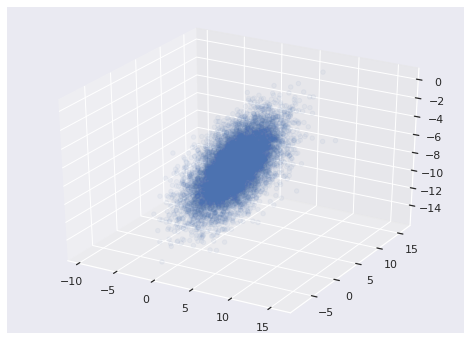

In [2]:
rng = np.random.RandomState(1)
Xmean = [2,4,-8]
Xcov=[[8.5,-3.5,2.1],[-3.5,12.,4.5],[2.1,4.5,3.5]]

npts=10000
X =  np.random.multivariate_normal(Xmean, Xcov, npts)
fig = plt.figure(figsize=(18,6))
ax0 = fig.add_subplot(121, projection='3d')
ax0.scatter(X[:, 0], X[:, 1], X[0:,2],alpha=0.05)

In [3]:
Xsmean=np.mean(X,axis=0)
print("Sample mean is ", Xsmean)
print("Recall, generating distribution has mean ", Xmean)
Xdev=X-Xsmean
S_unbiased = np.dot(Xdev.T,Xdev)/(npts-1)
S_biased = np.dot(Xdev.T,Xdev)/(npts)
print("Comparing numpy cov with S_biased above:\n", S_biased-np.cov(Xdev.T))
print("Comparing numpy cov with S_unbiased above:\n", S_unbiased-np.cov(Xdev.T))

Sample mean is  [ 2.07159363  3.92935495 -7.99840948]
Recall, generating distribution has mean  [2, 4, -8]
Comparing numpy cov with S_biased above:
 [[-0.00085388  0.00033438 -0.00022007]
 [ 0.00033438 -0.00118104 -0.0004457 ]
 [-0.00022007 -0.0004457  -0.00035126]]
Comparing numpy cov with S_unbiased above:
 [[-1.77635684e-15  8.88178420e-16  0.00000000e+00]
 [ 8.88178420e-16 -3.55271368e-15 -8.88178420e-16]
 [ 0.00000000e+00 -8.88178420e-16 -8.88178420e-16]]


# **Your turn** 
Of the two choices of denominator in defining the sample covariance, which one is implemented in numpy?

# **Extracting eigenvectors and eigenvalues**
Next, you should ensure you can verify the output of numpy's linear algebra routines. This will help you identify the row-column conventions used and will therefore enable you to extract the correct eigenvectors.



In [5]:
el, ev = np.linalg.eigh(S_unbiased)
print("Eigenvalues of sample covariance matrix:\n",el)
print("Correspoding eigenvectors of sample covariance matrix:\n",ev)
# Verify the row-column conventions returned by numpy
print("Rows of the array ev:\n", "row[2] ", ev[2], "\nS*ev[2]-el[2]*ev[2] = ", S_unbiased.dot(ev[2])-el[2]*ev[2])
print("Columns of the array ev:\n", "col[2] ", ev.T[2], "\nS*ev.T[2]-el[2]*ev.T[2] = ", S_unbiased.dot(ev.T[2])-el[2]*ev.T[2])

Eigenvalues of sample covariance matrix:
 [ 0.17025302  9.03157089 14.65996808]
Correspoding eigenvectors of sample covariance matrix:
 [[ 0.38508594  0.8401098  -0.38200045]
 [ 0.42440697  0.20634901  0.88164551]
 [-0.81950445  0.50163295  0.27708635]]
Rows of the array ev:
 row[2]  [-0.81950445  0.50163295  0.27708635] 
S*ev[2]-el[2]*ev[2] =  [ 3.94871169  2.54580218 -2.65651994]
Columns of the array ev:
 col[2]  [-0.38200045  0.88164551  0.27708635] 
S*ev.T[2]-el[2]*ev.T[2] =  [-8.88178420e-16  1.77635684e-15  0.00000000e+00]


# **Your Turn**
From the checks made what did you learn about the conventions used by eigh in returning eigenvectors? You should see the virtue of such checks every time you use canned routines in your code.

In [6]:
print("Compare the covariance of the gaussian from which the data was generated \nwith that covariance computed from that generated data.")
print("Data generating covariance: ", Xcov)
print("Sample covariance:\n",np.cov(Xdev.T))
print("Eigenvalues of true covariance matrix:\n",np.linalg.eigh(Xcov)[0])
print("Sample eigenvalues:\n", el)
print("Correspoding eigenvectors of covariance matrix:\n",np.linalg.eigh(Xcov)[1])
print("Sample eigenvectors\n", ev)

Compare the covariance of the gaussian from which the data was generated 
with that covariance computed from that generated data.
Data generating covariance:  [[8.5, -3.5, 2.1], [-3.5, 12.0, 4.5], [2.1, 4.5, 3.5]]
Sample covariance:
 [[ 8.53883577 -3.34381533  2.20070194]
 [-3.34381533 11.81040545  4.45696852]
 [ 2.20070194  4.45696852  3.51255076]]
Eigenvalues of true covariance matrix:
 [ 0.17276521  8.87868797 14.94854682]
Sample eigenvalues:
 [ 0.17025302  9.03157089 14.65996808]
Correspoding eigenvectors of covariance matrix:
 [[ 0.38535113  0.83720221 -0.38806825]
 [ 0.42556337  0.2119173   0.87976524]
 [-0.81877978  0.50416616  0.27462003]]
Sample eigenvectors
 [[ 0.38508594  0.8401098  -0.38200045]
 [ 0.42440697  0.20634901  0.88164551]
 [-0.81950445  0.50163295  0.27708635]]


# **Projection step**
We shall project the N=npts data points onto each of the three eigenvectors to get 3 sets of N 1-dimensional points for which we will compute the variance. We will print out the ratio of these values of projected variance to the three eigenvalues of the sample covariance matrix.

In [7]:
# computing the variance of the projected data and dividing by the corresponding eigenvalues
for i in range(3):
    print("variance = ",np.var(np.dot(Xdev,ev.T[2-i])), "ratio to eigenvalue = ",  np.var(np.dot(Xdev,ev.T[2-i]))/el[2-i])

variance =  14.658502080540313 ratio to eigenvalue =  0.9999000000000017
variance =  9.030667732768405 ratio to eigenvalue =  0.9999000000000006
variance =  0.1702359945557293 ratio to eigenvalue =  0.9998999999999942


# **Key principle guiding application of PCA**
Next you should compare the distributions of the projected data along the three eigenvectors of the covariance matrix. You will find that the pdf of the Gaussians with zero means and variances equal to the eigenvalues of the covariance matrix describe the distribution of the data well. You will also find that the distribution corresponding to the smallest eigenvalue is tightly distributed around the mean, with virtually no variation. **This is the direction that would be discarded by PCA**. Upon discarding this direction we would obtain the mapping  $f:R^3→R^2$  and we could describe each data point  $x_n∈R^3$  as a 2-dimensional vector  $y_n∈R^2$  whose 2 components are

$((x_n⋅v_a),(x_n⋅v_b))$
 
where  $v_a$  and  $v_b$  are the two eigenvectors of the covariance matrix with the largest eigenvalues.

Text(0.75, 0.75, 'PCA discards this')

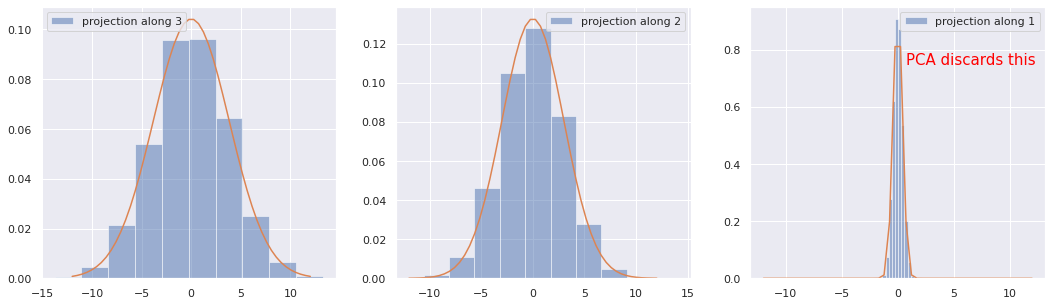

In [8]:
def gaussian(x, mean, var):
    return np.exp(-((x-mean)**2)/(2*var))/(np.sqrt(2*np.pi*var))
X1 = np.linspace(-12,12,50)
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18,5))
for i in range(3):
    ax[i].hist(np.dot(Xdev,ev.T[2-i]), density=True, label="projection along "+str(3-i), alpha=0.5)
    ax[i].plot(X1,gaussian(X1,0.,el[2-i]))
    ax[i].legend()
ax[2].text(0.75, 0.75, "PCA discards this", fontsize=15, color="red")

# PCA on a data-set of images of faces
The above example was a warm-up act, to illustrate the basic idea behind PCA, the role of projections along eigenvectors and the choices to be made about discarding specific eigendirections. Now, for a slightly more complex dataset.

Apply PCA on a small face dataset in order to familiarise yourself with how "eigenfaces" are generated. This was a popular application context. The procedure is much the same as above, with the only additional steps being the resizing of 2-d images into 1-d arrays and back.

In [9]:
dat=spio.loadmat("./Faces/Imgs.mat")

FileNotFoundError: ignored

In [10]:
images=dat['Imgs']
images.shape
imat=images.T
print(np.shape(imat))

NameError: ignored

There are 84 images of size (57,72) pixels each stored as a vector of length 4104. imat is a matrix with 84 rows (N) and 4104 columns (p).

NameError: ignored

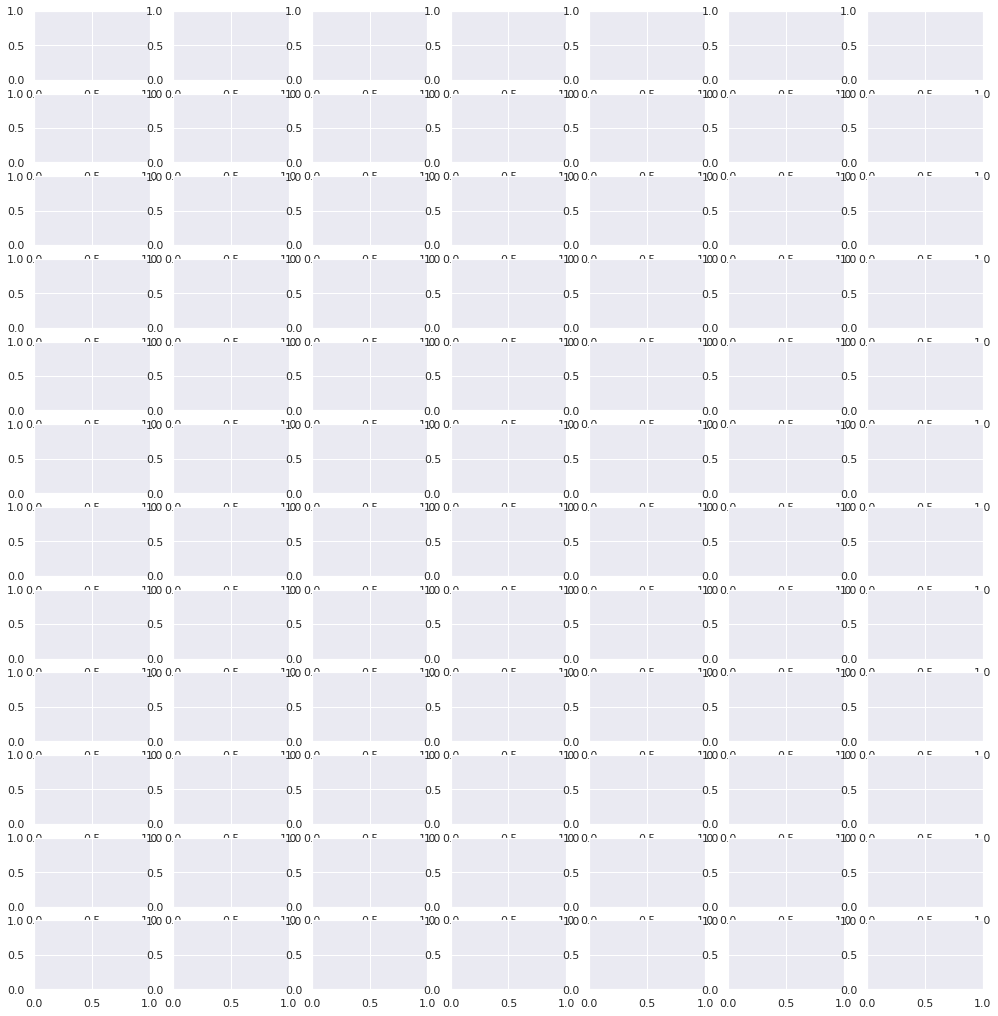

In [11]:
fig, ax = plt.subplots(nrows=12,ncols=7,figsize=(17,18))
for i in range(12):
    for j in range(7):
        ax[i][j].imshow(np.reshape(imat[i*7+j,:],(57,72)),cmap="gray")

# Using Singular Value Decomposition to perform PCA
In the lectures you were introduced to the idea that the linear subspaces "containing" the information in the data were given by successive singular vectors. The singular vectors of a matrix  $A$  satisfied the relation  $Av_i=σ_iu_i$  for  $i=1,…,r$ , for rank  $r$ . The largest singular value  $σ_1$  is the direction with the largest image of the map represented by the matrix  $A$ . For the mean subtracted (centred) image data $X~$ , we first find the **singular vectors** and **singular values**. We note that the eigenvalues of the covariance matrix  $X~X~^⊤$  are the squares of the singular values. Then we compute the fraction of the total variance captured by 1, 2, ..., 84 principal components.

In [12]:
meanim=np.mean(imat,axis=0)
devim=imat-meanim # centering the data
[u, s, v] = np.linalg.svd(devim) 
frac_variance = s**2/np.sum(s**2)  # square of the singular values are the variance components
cumfrac_variance = np.zeros(84)
for i in range(84):
    cumfrac_variance[i] = 100*np.sum(frac_variance[0:i+1])

NameError: ignored

NameError: ignored

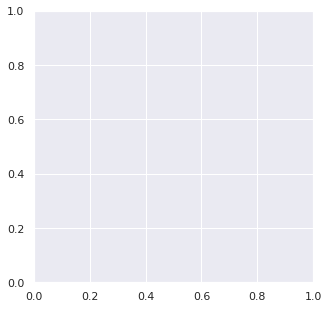

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(cumfrac_variance)
ax.set_ylabel("Percentage of total variance")
ax.set_xlabel("Number of principal components")

# **To consider**
**Question**: What fraction of the total variance is explained by the first 5 principal components?

Question: Compute the eigenvalues of (devim times devim.T), T for transpose and (devim.T times devim). What do you notice? Compare with the singular values s.

# **Eigenfaces**
Now plot the mean face and a few eigenfaces. These are projections along the principal components, just as we had projected the 3-dimensional data at the beginning of the notebook along the different eigenvectors (=principal components).

NameError: ignored

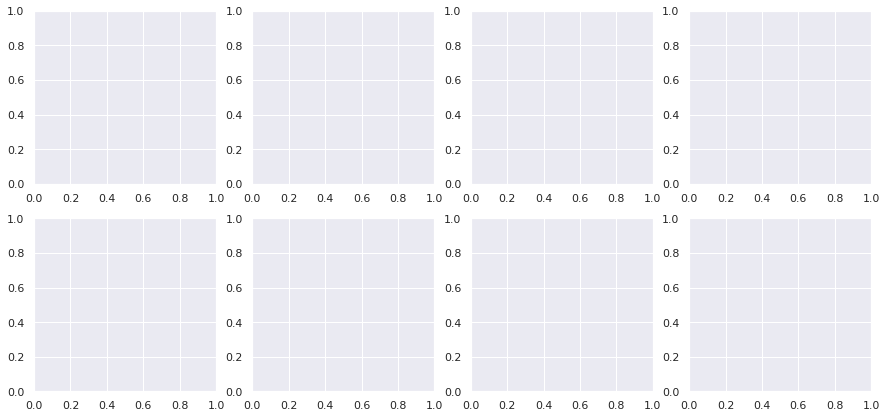

In [14]:
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(15,7))
ax[0][3].imshow(np.resize(meanim,(57,72)),cmap="gray")
ax[0][3].set_xlabel('mean',fontsize=18)
for i in range(2):
    for j in range(3):
        sid = 3*i+j
        ax[i][j].imshow(np.resize(np.dot(devim.T,u[sid]),(57,72)),cmap="gray")
        ax[i][j].set_xlabel(sid+1,fontsize=18)
ax[1][3].imshow(np.resize(np.dot(devim.T,u[29]),(57,72)),cmap="gray")
ax[1][3].set_xlabel(30,fontsize=18)

# **Exercises**
**Exercise**: You should experiment with reconstructing the images using a certain number of principal components. You will need to add the mean back in a suitable fashion.

**Exercise**: You could also try and use the first few principal components to distinguish between the 3 people whose images (1-37, 38-65, 66-84) are in the set. They are shown separately below.

NameError: ignored

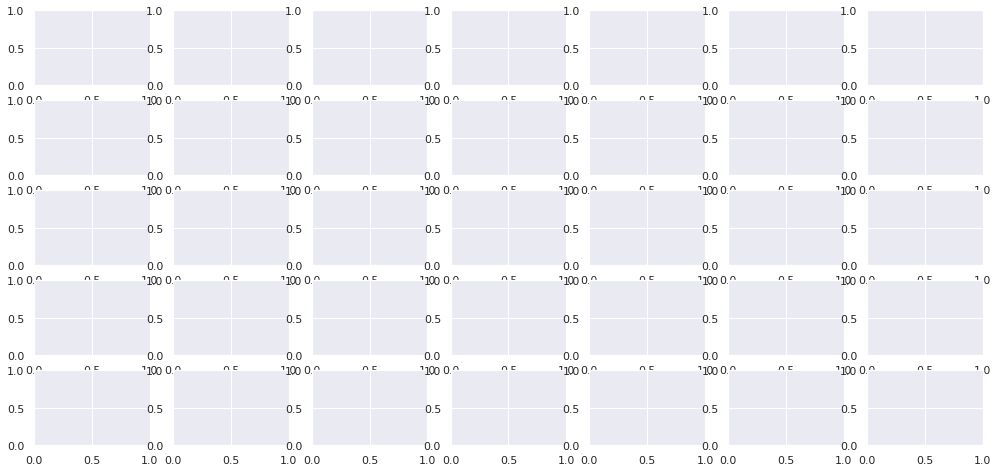

In [15]:
fig, ax = plt.subplots(nrows=5,ncols=7,figsize=(17,8))
for i in range(5):
    for j in range(7):
        imid =  i*5 + j
        ax[i][j].imshow(np.reshape(imat[imid,:],(57,72)),cmap="gray")

In [ ]:
fig, ax = plt.subplots(nrows=4,ncols=7,figsize=(17,8))
for i in range(4):
    for j in range(7):
        imid = 38 + i*4 + j
        ax[i][j].imshow(np.reshape(imat[imid,:],(57,72)),cmap="gray")

NameError: ignored

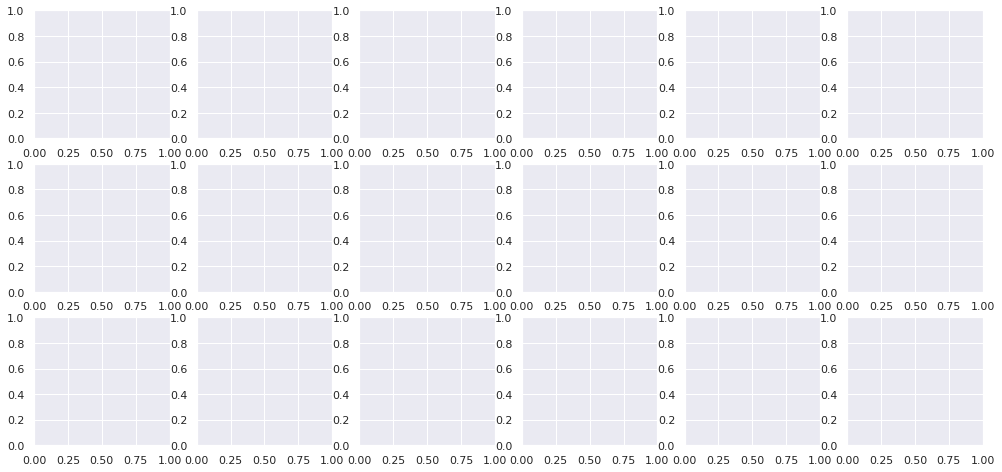

In [16]:
fig, ax = plt.subplots(nrows=3,ncols=6,figsize=(17,8))
for i in range(3):
    for j in range(6):
        imid = 67 + i*3 + j
        ax[i][j].imshow(np.reshape(imat[imid,:],(57,72)),cmap="gray")

# **References**
http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

http://www.cs.jhu.edu/~hager/Public/teaching/cs461/pami97-eigenfaces.pdf

http://ntucsu.csie.ntu.edu.tw/~mhyang/course/u0030/papers/Turk%20Pentland%20Eigenfaces.pdf